In [130]:
#TensorFlow
import tensorflow as tf
print(tf.__version__)

2.14.0


library download

In [131]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [133]:

iris = load_iris()

In [134]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [135]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [136]:
x = iris.data
y = iris.target

In [137]:
y_one_hot = to_categorical(y)

In [138]:
x.shape

(150, 4)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,y_one_hot, test_size=0.2, random_state=42)


In [140]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [141]:
model = Sequential() #model design
model.add(Dense(4, input_dim=x_train_scaled.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [142]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #combile

In [143]:
model_history = model.fit(x_train_scaled, y_train,validation_data=(x_test_scaled, y_test), epochs=20,batch_size=4) #train the model

Epoch 1/20
30/30 [==============================] - 1s 9ms/step - loss: 1.0542 - accuracy: 0.3500 - val_loss: 1.0169 - val_accuracy: 0.5000
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.9691 - accuracy: 0.5500 - val_loss: 0.9219 - val_accuracy: 0.6333
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.8857 - accuracy: 0.7417 - val_loss: 0.8154 - val_accuracy: 0.8000
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.7912 - accuracy: 0.7667 - val_loss: 0.7166 - val_accuracy: 0.8333
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.7583 - val_loss: 0.6246 - val_accuracy: 0.8333
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.7583 - val_loss: 0.5590 - val_accuracy: 0.8333
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 0.7667 - val_loss: 0.5042 - val_accuracy: 0.8000
Epoch 8/20
30/30 [==

In [144]:
y_pred_prob = model.predict(x_test_scaled) #model prediction
y_pred = np.argmax(y_pred_prob, axis=1)

1/1 [==============================] - 0s 60ms/step


In [145]:
#accyracy finding
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred)

In [146]:
conf_matrix #confusion matrix

array([[10,  0,  0],
       [ 0,  5,  4],
       [ 0,  0, 11]])

In [147]:
#evaluate model
print(model.evaluate(x_test_scaled, y_test))

1/1 [==============================] - 0s 25ms/step - loss: 0.2708 - accuracy: 0.8667
[0.2707752585411072, 0.8666666746139526]


Confusion matrix, without normalisation


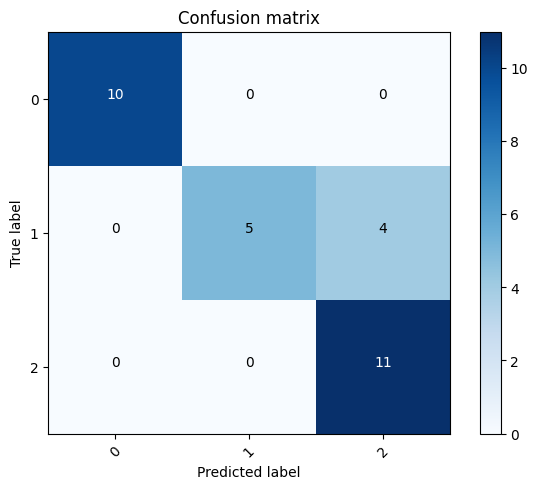

<Figure size 400x400 with 0 Axes>

In [148]:
#plot confusion matrix

def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")


  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")


plot_confusion_matrix(conf_matrix, list(range(3)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figure(figsize=(4, 4))
plt.show()

In [149]:
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30



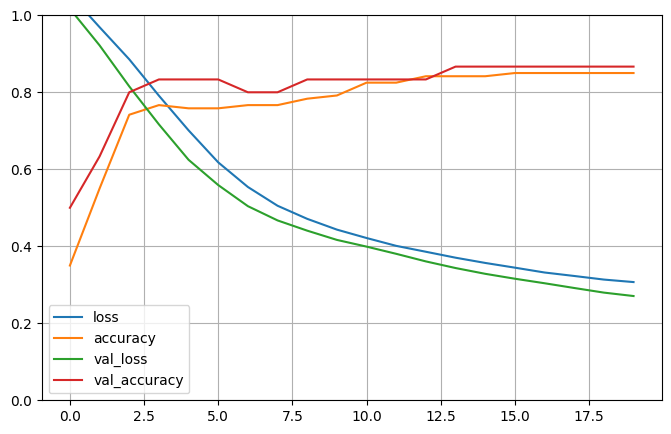

In [150]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [151]:
np.argmax(y_test, axis=1)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [152]:
flow=["Iris-Setosa","Iris-Versicolour","Iris-Virginica"]

In [153]:
flow_test=[]
for i in np.argmax(y_test, axis=1):
    flow_test.append(flow[i])

In [154]:
flow_pred=[]
for j in y_pred:
    flow_pred.append(flow[j])

In [155]:
flow_pred

['Iris-Virginica',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Setosa']

In [156]:
flow_test

['Iris-Versicolour',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Setosa',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Setosa',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Versicolour',
 'Iris-Versicolour',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Virginica',
 'Iris-Setosa',
 'Iris-Setosa']

<Figure size 400x600 with 0 Axes>

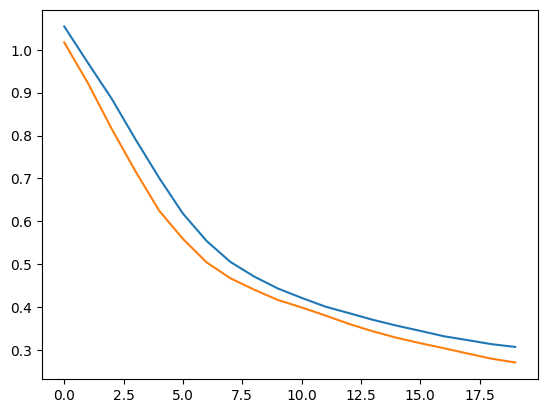

<Figure size 400x600 with 0 Axes>

In [161]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.figure(figsize=(4, 6))

<Figure size 400x600 with 0 Axes>

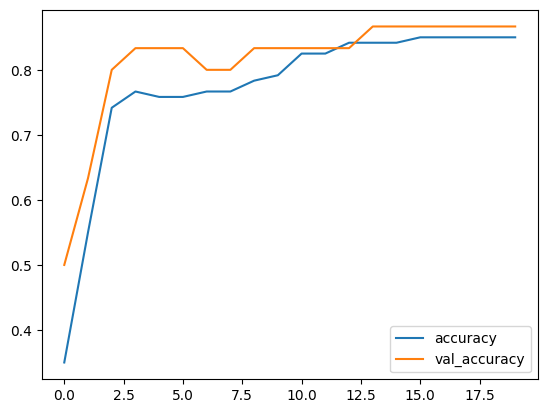

<Figure size 400x600 with 0 Axes>

In [160]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.figure(figsize=(4, 6))